# 分類

## 分類モデル構築の流れ

In [1]:
from sklearn.datasets import load_iris
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 先頭５行を表示
print("X:")
print(X[:5, :])
print("y:")
print(y[:5])

X:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
y:
[0 0 0 0 0]


In [2]:
from sklearn.model_selection import train_test_split
# 学習データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(
                    X, y, test_size=0.3, random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(105, 4)
(45, 4)
(105,)
(45,)


## サポートベクタマシン

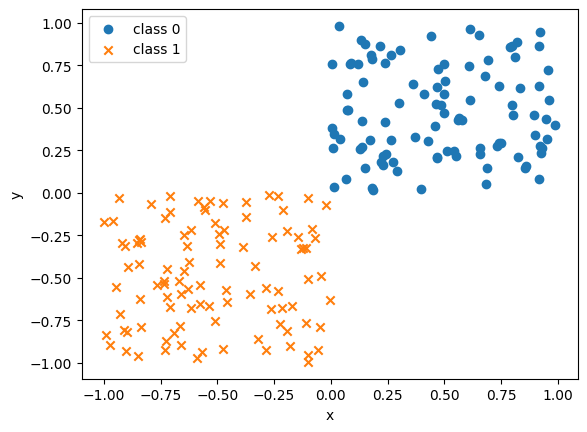

In [3]:
import numpy as np
import matplotlib.pyplot as plt
# 乱数シードを固定
rng = np.random.default_rng(123)
# x軸y軸ともに0から1までの一様分布から100点をサンプリング
X0 = rng.uniform(size=(100, 2))
# クラス0のラベルを100個生成
y0 = np.repeat(0, 100)
# x軸y軸ともに-1から0までの一様分布から100点をサンプリング
X1 = rng.uniform(-1.0, 0.0, size=(100, 2))
# クラス1のラベルを100個生成
y1 = np.repeat(1, 100)
# 散布図にプロット
fig, ax = plt.subplots()
ax.scatter(X0[:, 0], X0[:, 1],
           marker="o", label="class 0")
ax.scatter(X1[:, 0], X1[:, 1],
           marker="x", label="class 1")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.legend()
plt.show()

In [4]:
from sklearn.svm import SVC
# 学習，および決定境界，マージン，サポートベクタを可視化する関数
def plot_boundary_margin_sv(X0, y0, X1, y1, kernel, C,
                            xmin=-1, xmax=1, ymin=-1, ymax=1):
    # サポートベクタマシンのインスタンス化
    svc = SVC(kernel=kernel, C=C)
    # 学習
    svc.fit(np.vstack((X0, X1)), np.hstack((y0, y1)))
    
    fig, ax = plt.subplots()
    ax.scatter(X0[:, 0], X0[:, 1],
               marker="o", label="class 0")
    ax.scatter(X1[:, 0], X1[:, 1],
               marker="x", label="class 1")
    # 決定境界とマージンをプロット
    xx, yy = np.meshgrid(np.linspace(xmin, xmax, 100),
                         np.linspace(ymin, ymax, 100))
    xy = np.vstack([xx.ravel(), yy.ravel()]).T
    p = svc.decision_function(xy).reshape((100, 100))
    ax.contour(xx, yy, p, 
               colors="k", levels=[-1, 0, 1], 
               alpha=0.5, linestyles=["--", "-", "--"])
    # サポートベクタをプロット
    ax.scatter(svc.support_vectors_[:, 0],  
               svc.support_vectors_[:, 1], 
               s=250, facecolors="none",
               edgecolors="black")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.legend(loc="best")
    plt.show()

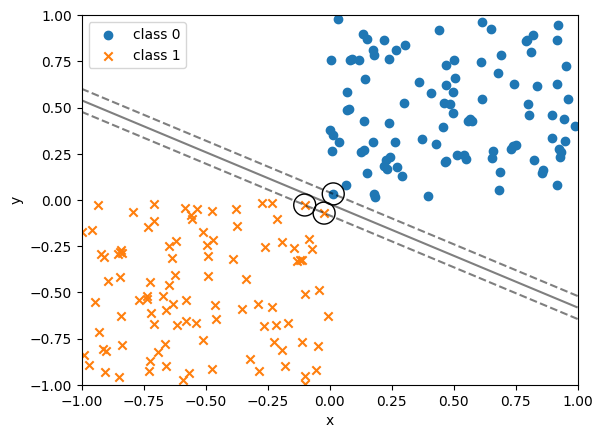

In [5]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel="linear", C=1e6)

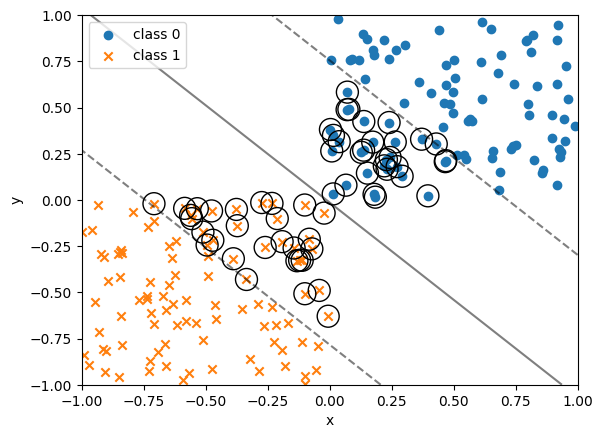

In [6]:
# 決定境界、マージン、サポートベクタをプロット
plot_boundary_margin_sv(X0, y0, X1, y1,
                        kernel="linear", C=0.1)

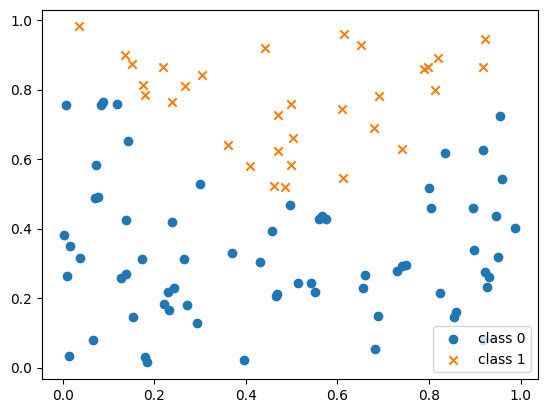

In [7]:
rng = np.random.default_rng(123)
X = rng.random(size=(100, 2))
y = (X[:, 1] > 2*(X[:, 0]-0.5)**2 + 0.5).astype(int)
fig, ax = plt.subplots()
ax.scatter(X[y == 0, 0], X[y == 0, 1],
           marker="o", label="class 0")
ax.scatter(X[y == 1, 0], X[y == 1, 1],
           marker="x", label="class 1")
ax.legend(loc="best")
plt.show()

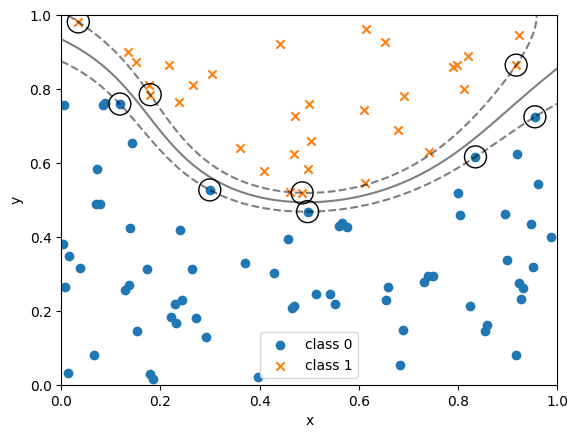

In [8]:
# 決定境界、マージン、サポートベクタをプロット
X0, X1 = X[y == 0, :], X[y == 1, :]
y0, y1 = y[y == 0], y[y == 1]
plot_boundary_margin_sv(X0,  y0,  X1,  y1,
                        kernel="rbf", C=1e3, xmin=0, ymin=0)

## 決定木

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
# Irisデータセットを読み込む
iris = load_iris()
X, y = iris.data, iris.target
# 学習データセットとテストデータセットに分割する
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=123)
# 決定木をインスタンス化する (木の最大の深さ=3)
tree = DecisionTreeClassifier(max_depth=3,
                              random_state=123)
# 学習
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=123)

In [10]:
%pip install pydotplus


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
# dot形式のデータを抽出
dot_data = export_graphviz(tree, filled=True, rounded=True,
               class_names=["Setosa",
                            "Versicolor",               
                            "Virginica"],
               feature_names=["Sepal Length",
                              "Sepal Width",            
                              "Petal Length",     
                              "Petal Width"],
               out_file=None)
# 決定木のプロットを出力
graph = graph_from_dot_data(dot_data)
graph.write_png("tree.png")

True

In [12]:
# 予測
y_pred = tree.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])

## ランダムフォレスト

In [13]:
from sklearn.ensemble import RandomForestClassifier
# ランダムフォレストをインスタンス化する
forest = RandomForestClassifier(n_estimators=100,
                                random_state=123)
# 学習
forest.fit(X_train, y_train)
# 予測
y_pred = forest.predict(X_test)
y_pred

array([1, 2, 2, 1, 0, 1, 1, 0, 0, 1, 2, 0, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1,
       0, 2, 0, 0, 0, 2, 2, 0, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1, 0, 2, 2,
       2])